(2, 25)
[[13], [13], [13], [13], [9], [13], [9], [13], [23], [20], [9], [9], [9], [9], [20], [23], [23], [13], [2], [20], [9], [13], [13], [20], [2], [13], [2], [2], [13], [20]]


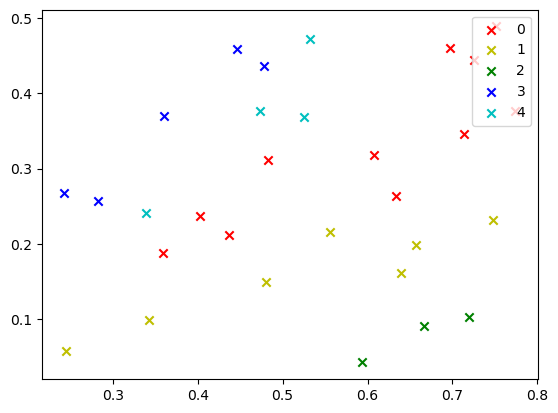

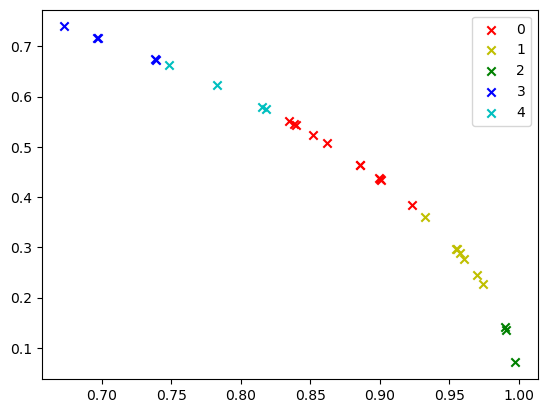

In [1]:
import numpy as np
import pylab as pl

class SOM(object):
    def __init__(self, X, output, iteration, batch_size):
        """
        :param X:  形状是N*D， 输入样本有N个,每个D维
        :param output: (n,m)一个元组，为输出层的形状是一个n*m的二维矩阵
        :param iteration:迭代次数
        :param batch_size:每次迭代时的样本数量
        初始化一个权值矩阵，形状为D*(n*m)，即有n*m权值向量，每个D维
        """
        self.X = X
        self.output = output
        self.iteration = iteration
        self.batch_size = batch_size
        self.W = np.random.rand(X.shape[1], output[0] * output[1])
        print (self.W.shape)

    def GetN(self, t):
        """
        :param t:时间t, 这里用迭代次数来表示时间
        :return: 返回一个整数，表示拓扑距离，时间越大，拓扑邻域越小
        """
        a = min(self.output)
        return int(a-float(a)*t/self.iteration)

    def Geteta(self, t, n):
        """
        :param t: 时间t, 这里用迭代次数来表示时间
        :param n: 拓扑距离
        :return: 返回学习率，
        """
        return np.power(np.e, -n)/(t+2)

    def updata_W(self, X, t, winner):
        N = self.GetN(t)
        for x, i in enumerate(winner):
            to_update = self.getneighbor(i[0], N)
            for j in range(N+1):
                e = self.Geteta(t, j)
                for w in to_update[j]:
                    self.W[:, w] = np.add(self.W[:,w], e*(X[x,:] - self.W[:,w]))

    def getneighbor(self, index, N):
        """
        :param index:获胜神经元的下标
        :param N: 邻域半径
        :return ans: 返回一个集合列表，分别是不同邻域半径内需要更新的神经元坐标
        """
        a, b = self.output
        length = a*b
        def distence(index1, index2):
            i1_a, i1_b = index1 // a, index1 % b
            i2_a, i2_b = index2 // a, index2 % b
            return np.abs(i1_a - i2_a), np.abs(i1_b - i2_b)

        ans = [set() for i in range(N+1)]
        for i in range(length):
            dist_a, dist_b = distence(i, index)
            if dist_a <= N and dist_b <= N: ans[max(dist_a, dist_b)].add(i)
        return ans




    def train(self):
        """
        train_Y:训练样本与形状为batch_size*(n*m)
        winner:一个一维向量，batch_size个获胜神经元的下标
        :return:返回值是调整后的W
        """
        count = 0
        while self.iteration > count:
            train_X = self.X[np.random.choice(self.X.shape[0], self.batch_size)]
            normal_W(self.W)
            normal_X(train_X)
            train_Y = train_X.dot(self.W)
            winner = np.argmax(train_Y, axis=1).tolist()
            self.updata_W(train_X, count, winner)
            count += 1
        return self.W

    def train_result(self):
        normal_X(self.X)
        train_Y = self.X.dot(self.W)
        winner = np.argmax(train_Y, axis=1).tolist()
        print (winner)
        return winner

def normal_X(X):
    """
    :param X:二维矩阵，N*D，N个D维的数据
    :return: 将X归一化的结果
    """
    N, D = X.shape
    for i in range(N):
        temp = np.sum(np.multiply(X[i], X[i]))
        X[i] /= np.sqrt(temp)
    return X
def normal_W(W):
    """
    :param W:二维矩阵，D*(n*m)，D个n*m维的数据
    :return: 将W归一化的结果
    """
    for i in range(W.shape[1]):
        temp = np.sum(np.multiply(W[:,i], W[:,i]))
        W[:, i] /= np.sqrt(temp)
    return W

#画图
def draw(C):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)

    pl.legend(loc='upper right')
    pl.show()

#数据集：每三个是一组分别是西瓜的编号，密度，含糖量
data = """
1,0.697,0.46,2,0.774,0.376,3,0.634,0.264,4,0.608,0.318,5,0.556,0.215,
6,0.403,0.237,7,0.481,0.149,8,0.437,0.211,9,0.666,0.091,10,0.243,0.267,
11,0.245,0.057,12,0.343,0.099,13,0.639,0.161,14,0.657,0.198,15,0.36,0.37,
16,0.593,0.042,17,0.719,0.103,18,0.359,0.188,19,0.339,0.241,20,0.282,0.257,
21,0.748,0.232,22,0.714,0.346,23,0.483,0.312,24,0.478,0.437,25,0.525,0.369,
26,0.751,0.489,27,0.532,0.472,28,0.473,0.376,29,0.725,0.445,30,0.446,0.459"""

a = data.split(',')
dataset = np.mat([[float(a[i]), float(a[i+1])] for i in range(1, len(a)-1, 3)])
dataset_old = dataset.copy()

som = SOM(dataset, (5, 5), 1, 30)
som.train()
res = som.train_result()
classify = {}
for i, win in enumerate(res):
    if not classify.get(win[0]):
        classify.setdefault(win[0], [i])
    else:
        classify[win[0]].append(i)
C = []#未归一化的数据分类结果
D = []#归一化的数据分类结果
for i in classify.values():
    C.append(dataset_old[i].tolist())
    D.append(dataset[i].tolist())
draw(C)
draw(D)

In [5]:

import numpy as np
import pylab as pl

class SOM(object):
    def __init__(self, X, output, iteration, batch_size):
        """
        :param X:  形状是N*D， 输入样本有N个,每个D维
        :param output: (n,m)一个元组，为输出层的形状是一个n*m的二维矩阵
        :param iteration:迭代次数
        :param batch_size:每次迭代时的样本数量
        初始化一个权值矩阵，形状为D*(n*m)，即有n*m权值向量，每个D维
        """
        self.X = X
        self.output = output
        self.iteration = iteration
        self.batch_size = batch_size
        self.W = np.random.rand(X.shape[1], output[0] * output[1])
        print (self.W.shape)

    def GetN(self, t):
        """
        :param t:时间t, 这里用迭代次数来表示时间
        :return: 返回一个整数，表示拓扑距离，时间越大，拓扑邻域越小
        """
        a = min(self.output)
        return int(a-float(a)*t/self.iteration)

    def Geteta(self, t, n):
        """
        :param t: 时间t, 这里用迭代次数来表示时间
        :param n: 拓扑距离
        :return: 返回学习率，
        """
        return np.power(np.e, -n)/(t+2)

    def updata_W(self, X, t, winner):
        N = self.GetN(t)
        for x, i in enumerate(winner):
            to_update = self.getneighbor(i[0], N)
            for j in range(N+1):
                e = self.Geteta(t, j)
                for w in to_update[j]:
                    self.W[:, w] = np.add(self.W[:,w], e*(X[x,:] - self.W[:,w]))

    def getneighbor(self, index, N):
        """
        :param index:获胜神经元的下标
        :param N: 邻域半径
        :return ans: 返回一个集合列表，分别是不同邻域半径内需要更新的神经元坐标
        """
        a, b = self.output
        length = a*b
        def distence(index1, index2):
            i1_a, i1_b = index1 // a, index1 % b
            i2_a, i2_b = index2 // a, index2 % b
            return np.abs(i1_a - i2_a), np.abs(i1_b - i2_b)

        ans = [set() for i in range(N+1)]
        for i in range(length):
            dist_a, dist_b = distence(i, index)
            if dist_a <= N and dist_b <= N: ans[max(dist_a, dist_b)].add(i)
        return ans




    def train(self):
        """
        train_Y:训练样本与形状为batch_size*(n*m)
        winner:一个一维向量，batch_size个获胜神经元的下标
        :return:返回值是调整后的W
        """
        count = 0
        while self.iteration > count:
            train_X = self.X[np.random.choice(self.X.shape[0], self.batch_size)]
            normal_W(self.W)
            normal_X(train_X)
            train_Y = train_X.dot(self.W)
            winner = np.argmax(train_Y, axis=1).tolist()
            self.updata_W(train_X, count, winner)
            count += 1
        return self.W

    def train_result(self):
        normal_X(self.X)
        train_Y = self.X.dot(self.W)
        winner = np.argmax(train_Y, axis=1).tolist()
        print (winner)
        return winner

def normal_X(X):
    """
    :param X:二维矩阵，N*D，N个D维的数据
    :return: 将X归一化的结果
    """
    N, D = X.shape
    for i in range(N):
        temp = np.sum(np.multiply(X[i], X[i]))
        X[i] /= np.sqrt(temp)
    return X
def normal_W(W):
    """
    :param W:二维矩阵，D*(n*m)，D个n*m维的数据
    :return: 将W归一化的结果
    """
    for i in range(W.shape[1]):
        temp = np.sum(np.multiply(W[:,i], W[:,i]))
        W[:, i] /= np.sqrt(temp)
    return W

#画图
def draw(C):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)

    pl.legend(loc='upper right')
    pl.show()

#数据集：每三个是一组分别是西瓜的编号，密度，含糖量

dataset = np.mat([[1,0,1],[1,0,0],[0,1,0],[0,1,1]])
dataset_old = dataset.copy()

som = SOM(dataset, (5, 5), 1, 30)
som.train()
res = som.train_result()
classify = {}
for i, win in enumerate(res):
    if not classify.get(win[0]):
        classify.setdefault(win[0], [i])
    else:
        classify[win[0]].append(i)
C = []#未归一化的数据分类结果
D = []#归一化的数据分类结果
for i in classify.values():
    C.append(dataset_old[i].tolist())
    D.append(dataset[i].tolist())
draw(C)
draw(D)

(3, 25)


TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'l') according to the casting rule ''same_kind''

In [3]:
print(dataset)

[[0.83462042 0.55082553]
 [0.89948206 0.43695769]
 [0.92316306 0.38440859]
 [0.88611663 0.46346232]
 [0.93269556 0.36066465]
 [0.8619892  0.50692665]
 [0.95521909 0.29589947]
 [0.90052381 0.43480669]
 [0.99079392 0.13537875]
 [0.67308629 0.73956395]
 [0.97398763 0.2266012 ]
 [0.96078054 0.27730984]
 [0.96969453 0.24432053]
 [0.95746454 0.28855096]
 [0.69735496 0.71672593]
 [0.99750121 0.07064933]
 [0.98989435 0.14180684]
 [0.88587983 0.46391479]
 [0.81503102 0.57941733]
 [0.73910934 0.67358547]
 [0.95511398 0.29623856]
 [0.89990405 0.43608796]
 [0.83998984 0.54260213]
 [0.73805078 0.67474517]
 [0.81813225 0.5750301 ]
 [0.83800995 0.54565495]
 [0.7480296  0.66366536]
 [0.78280258 0.62227013]
 [0.85226317 0.52311326]
 [0.69687755 0.71719013]]
